## Demonstrate the statistical properties of the coarse grained network

In [54]:
import pickle
import seaborn as sns
sns.set_palette('colorblind')
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['xtick.major.size'] = 9
matplotlib.rcParams['ytick.major.size'] = 9
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4

matplotlib.rcParams['axes.linewidth'] = 2

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['ytick.minor.width'] = 2

matplotlib.rcParams['figure.figsize'] = [10, 8]
matplotlib.rcParams['text.usetex'] = True

In [55]:
import networkx as nx

In [56]:
G_berlin = nx.read_gpickle("../data/homogenized_networks/berlin/G_orig.gpkl")
H_berlin = nx.read_gpickle("../data/homogenized_networks/berlin/G_homog.gpkl")

with open("../data/homogenized_networks/berlin/mapping.pkl", 'rb') as f:
    mapping_berlin = pickle.load(f)

G_goe = nx.read_gpickle("../data/homogenized_networks/goe/G_orig.gpkl")
H_goe = nx.read_gpickle("../data/homogenized_networks/goe/G_homog.gpkl")

G_harz = nx.read_gpickle("../data/homogenized_networks/harz/G_orig.gpkl")
H_harz = nx.read_gpickle("../data/homogenized_networks/harz/G_homog.gpkl")

In [41]:
import numpy as np

In [42]:
orig_edge_lengths = np.array([data['length'] for u,v, data in G_berlin.edges(data=True)])
homog_edge_lengths = np.array([data['length'] for u,v, data in H_berlin.edges(data=True)])

In [43]:
orig_edge_lengths.mean()

214.41487261503926

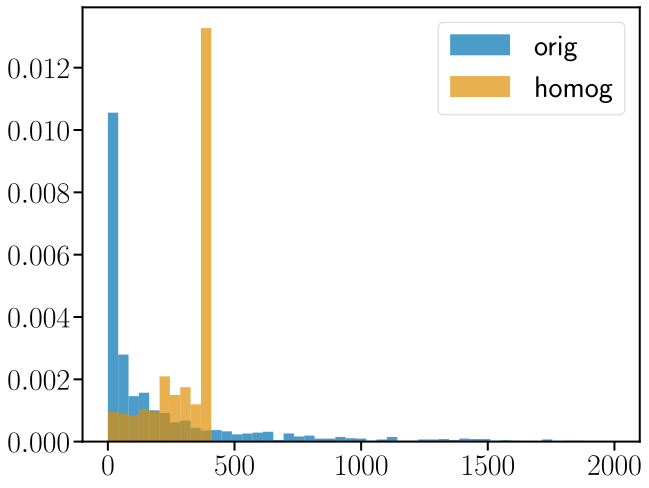

In [44]:
fig, ax = plt.subplots()

bins = np.linspace(0, 2000, 50)

ax.hist(orig_edge_lengths, label='orig', density=True, alpha=0.7, bins=bins)
ax.hist(homog_edge_lengths, label='homog', density=True, alpha=0.7, bins=bins)

ax.legend()

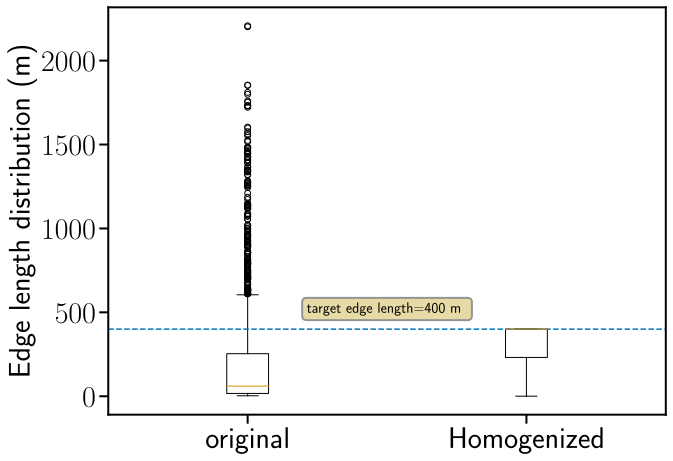

In [45]:
fig, ax = plt.subplots(figsize=(10, 7.5))

ax.boxplot([orig_edge_lengths, homog_edge_lengths], labels=['original', 'Homogenized'])
ax.axhline(y=400, linestyle='--')

bbox_props = dict(boxstyle="round,pad=0.3", fc="xkcd:beige", ec="xkcd:grey", lw=2)

axmid = np.array(ax.get_xlim()).mean()
t = ax.text(axmid, 400*1.3, f"target edge length=400 m", ha="center", va="center", rotation=0,
            size=15,
            bbox=bbox_props)

ax.set_ylabel("Edge length distribution (m)")

fig.savefig("illustration_edge_length_distrib.pdf")

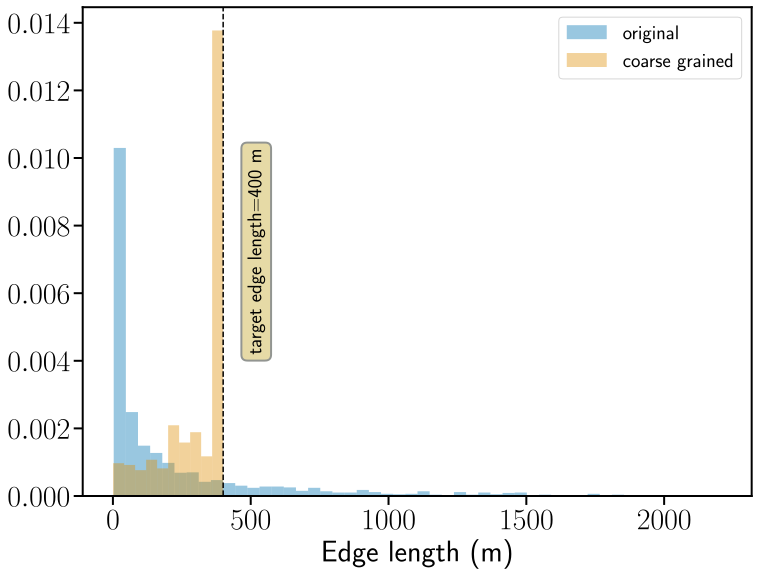

In [46]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.distplot(orig_edge_lengths, kde=False, ax=ax, norm_hist=True, label='original')
sns.distplot(homog_edge_lengths, kde=False, ax=ax, norm_hist=True, label='coarse grained')


#ax.boxplot([orig_edge_lengths, homog_edge_lengths], labels=['original', 'Homogenized'])
ax.axvline(x=400, linestyle='--', color='k')

bbox_props = dict(boxstyle="round,pad=0.3", fc="xkcd:beige", ec="xkcd:grey", lw=2)

axmid = np.array(ax.get_ylim()).mean()
t = ax.text(400*1.3, axmid, f"target edge length=400 m", ha="center", va="center", rotation=90,
            size=20,
            bbox=bbox_props)

ax.set_xlabel("Edge length (m)")
ax.legend(fontsize=20)
fig.savefig("illustration_edge_length_distrib.pdf", bbox_inches='tight')

In [47]:
orig_edge_lengths.mean(), orig_edge_lengths.std(), homog_edge_lengths.mean(), homog_edge_lengths.std()

(214.41487261503926, 336.095682203759, 310.1885804480652, 118.92617815249255)

In [48]:
np.median(orig_edge_lengths), np.quantile(orig_edge_lengths, [0.2, 0.9]), np.median(homog_edge_lengths), np.quantile(homog_edge_lengths, [0.2, 0.9])

(60.493, array([ 15.101, 632.312]), 400.0, array([208.785, 400.   ]))

### Compare shortest path  lengths

In [49]:
do = nx.average_shortest_path_length(G_berlin, weight='length')
dn = nx.average_shortest_path_length(H_berlin)*np.array([data['length'] for u,v,data in H_berlin.edges(data=True)]).mean()
do, dn, (dn/do)

(5859.57457593204, 5209.202973278616, 0.8890070270075923)

In [50]:
do = nx.average_shortest_path_length(G_harz, weight='length')
dn = nx.average_shortest_path_length(H_harz)*np.array([data['length'] for u,v,data in H_harz.edges(data=True)]).mean()
do, dn, (dn/do)

(13162.816627510603, 15726.827472452736, 1.1947919596162488)

In [51]:
do = nx.average_shortest_path_length(G_goe, weight='length')
dn = nx.average_shortest_path_length(H_goe)*np.array([data['length'] for u,v,data in H_goe.edges(data=True)]).mean()
do, dn, (dn/do)

(10024.885839409695, 10599.823795933624, 1.0573510726938895)

In [52]:
from itertools import combinations

In [57]:
l = []
t = []

N = 1000
    
for idx, (u,v) in enumerate(combinations(G_berlin.nodes(), 2)):
    if idx > N:
        break
    up, vp = mapping_berlin[u], mapping_berlin[v]
    if up == vp:
        continue
    try:
        len_orig = nx.shortest_path_length(G_berlin, u, v,  weight='length')
        len_new = nx.shortest_path_length(H_berlin, up, vp)*400
    except:
        continue
 
    l.append(len_orig)
    t.append(len_new)

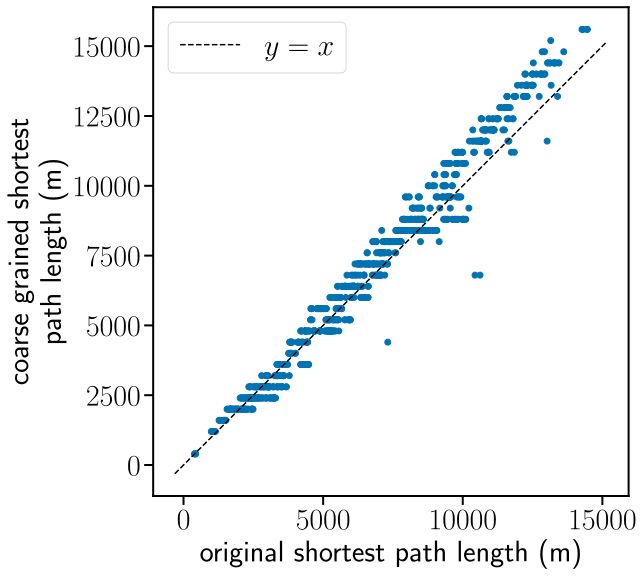

In [58]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_aspect('equal')
ax.scatter(l, t)

xmin, xmax = ax.get_xlim()

ax.plot([xmin, xmax], [xmin, xmax], 'k--', label=r"$y=x$")

ax.set_xlabel("original shortest path length (m)")
ax.set_ylabel("coarse grained shortest\npath length (m)")
ax.legend()

fig.savefig("comparison_shortest_path_length.pdf", bbox_inches='tight')